In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

Importing Dataset as pandas dataframe

In [2]:
df = pd.read_csv(r"C:\Users\amank\DMML CW\IBM.csv")
df.dataframeName = 'IBM.csv'
nRow, nCol = df.shape
print(f'{nRow} rows and {nCol} columns found')

1470 rows and 35 columns found


In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df['EmployeeNumber'].describe()

count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64

Using the function describe(), we can see the EmplyoeeCount only contains 1, StandardHours contains only 80 so we can drop these columns 

In [6]:
df.drop('EmployeeCount',axis =1,inplace=True)
df.drop('StandardHours',axis =1,inplace=True)
df.drop('Over18',axis =1,inplace=True)


We can also see EmployeeNumber which would also not help in any form of predicition so that can be dropped as well 

In [7]:
df.drop('EmployeeNumber',axis =1,inplace=True)

Checking the datatypes in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

There are no null entries in the dataset, but there are non numeric categorical data. 

Performing some analysis before encoding 

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

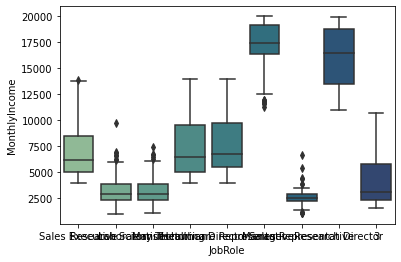

In [72]:
sns.boxplot(data = df, x = "JobRole", y = "MonthlyIncome", palette = "crest",)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

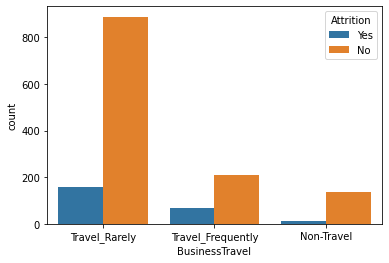

In [10]:
sns.countplot(x='BusinessTravel', data=df, hue="Attrition")

<AxesSubplot:xlabel='Gender', ylabel='count'>

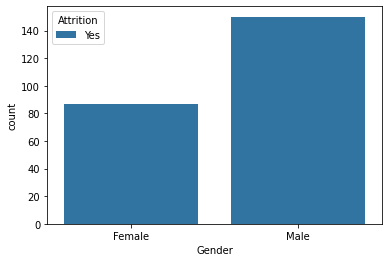

In [11]:
sns.countplot(x='Gender', data=df[df['Attrition']=='Yes'], hue="Attrition")

From the above bar graph we can see that more male employees have left compared to female employees 

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

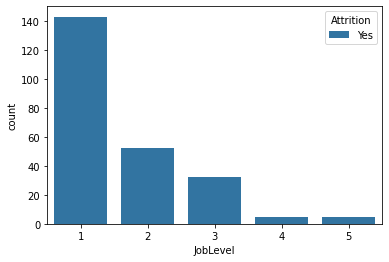

In [12]:
sns.countplot(x='JobLevel', data=df[df['Attrition']=='Yes'], hue="Attrition")

From the above bar graph we can see that people with low job level have left the company compared to people with high job level.

<AxesSubplot:xlabel='Department', ylabel='count'>

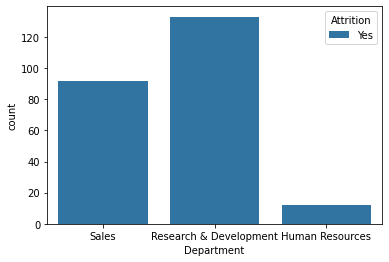

In [13]:
sns.countplot(x='Department', data=df[df['Attrition']=='Yes'], hue="Attrition")

And finally more people from research & development have left compared to other departments 

add more ?
Education

In [14]:
corr_matrix = df.corr()
corr_matrix

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


Now before getting correlation matrix we must convert 

In [15]:
temp_df = df

temp_df.Attrition.replace({'Yes' : 1,'No' : 0,}, inplace = True)
corr_matrix = temp_df.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix,roc_auc_score,plot_roc_curve
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")


df.replace({'Yes':1,'No':0,'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 3,
'Sales' : 1, 'Research & Development' : 2, 'Human Resources' : 3}, inplace=True)
X = df.drop(['Attrition'],axis=1)

Y = df['Attrition']
# encoder.fit(X) 
X = pd.get_dummies(X)

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, shuffle= True)


In [17]:
from sklearn.model_selection import cross_validate,RepeatedKFold,RepeatedStratifiedKFold



In [18]:
# from sklearn.preprocessing import StandardScaler, RobustScaler
# sc = RobustScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

Gaussian Naive Bayes

reference : https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

In [19]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_classifier  = GaussianNB()

y_pred = GaussianNB_classifier.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
           % (X_test.shape[0], (y_test != y_pred).sum()))

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred)

Number of mislabeled points out of a total 294 points : 61


In [55]:
from pycm import ConfusionMatrix

cm = ConfusionMatrix(actual_vector=np.array(y_test), predict_vector=np.array(y_pred))

TPR = cm.class_stat.get("TPR")
FPR = cm.class_stat.get("FPR")
TNR = cm.class_stat.get("TNR")
FNR  = cm.class_stat.get("FNR")
ACC = cm.class_stat.get("ACC")
F1 = cm.class_stat.get("F1")
AUC= cm.class_stat.get("AUC")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_area = roc_auc_score(y_test, GaussianNB_classifier.predict_proba(X_test)[:,1])

In [60]:
print("Accuracy : ", ACC)
print("Precision : ", precision)
print("Recall : ", recall)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)
print("True Negative Rate : ", TNR)
print("False Negative Rate : ", FNR)


print("F1 Score : ", F1)
print("ROC Area : ", AUC)


Accuracy :  {0: 0.7925170068027211, 1: 0.7925170068027211}
Precision :  0.4146341463414634
Recall :  0.723404255319149
True Positive Rate :  {0: 0.805668016194332, 1: 0.723404255319149}
False Positive Rate :  {0: 0.276595744680851, 1: 0.19433198380566796}
True Negative Rate :  {0: 0.723404255319149, 1: 0.805668016194332}
False Negative Rate :  {0: 0.19433198380566796, 1: 0.276595744680851}
F1 Score :  {0: 0.8671023965141612, 1: 0.5271317829457365}
ROC Area :  {0: 0.7645361357567405, 1: 0.7645361357567405}


<AxesSubplot:>

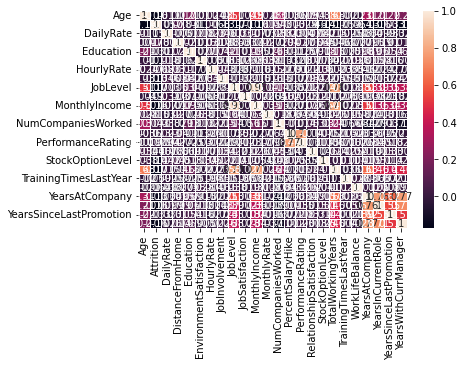

In [22]:

sns.heatmap(corr_matrix,annot = True,linewidths = 1 )

ROC 

Reference : https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

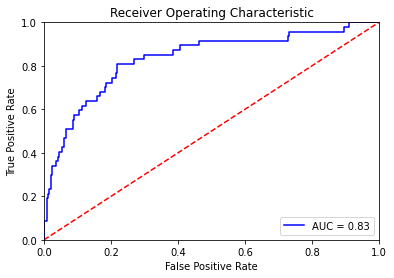

In [61]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc


probs = GaussianNB_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

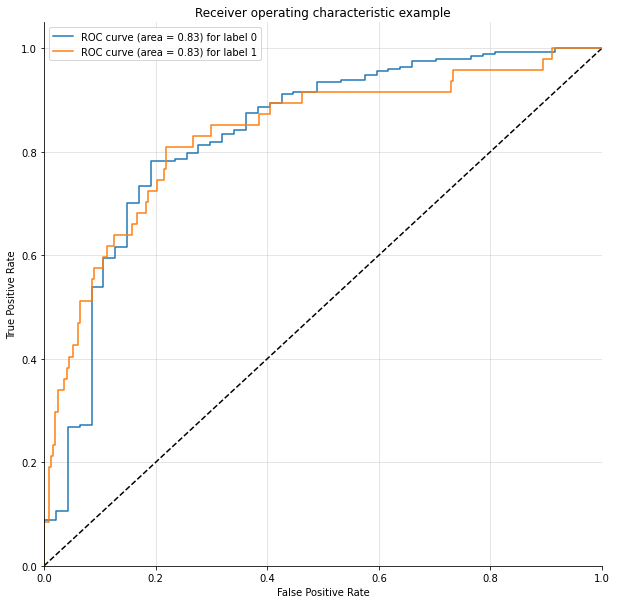

In [71]:
def plot_multiclass_roc(y_prob, X_test, y_test, n_classes, figsize=(10, 10)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(probs,X_test, y_test,2)    
